In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.datasets import fetch_california_housing
# import warnings
# warnings.filterwarnings('ignore')
# california_data = fetch_california_housing(as_frame=True)
df = pd.read_csv('housing.csv')
# df = california_data.frame
df.shape

(20640, 10)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
df.duplicated().sum()

0

In [4]:
med = df['total_bedrooms'].median()

In [5]:
df['total_bedrooms'].fillna(med, inplace=True)
df.nunique()

/tmp/ipykernel_11033/3549898818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(med, inplace=True)


longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [6]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
df['total_bedrooms'].median()

435.0

In [8]:
for i in df.iloc[:, 2:7]:
    df[i] = df[i].astype('int')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200.0,NEAR BAY


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,536.838857,419.391878,1.0000,297.0000,435.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


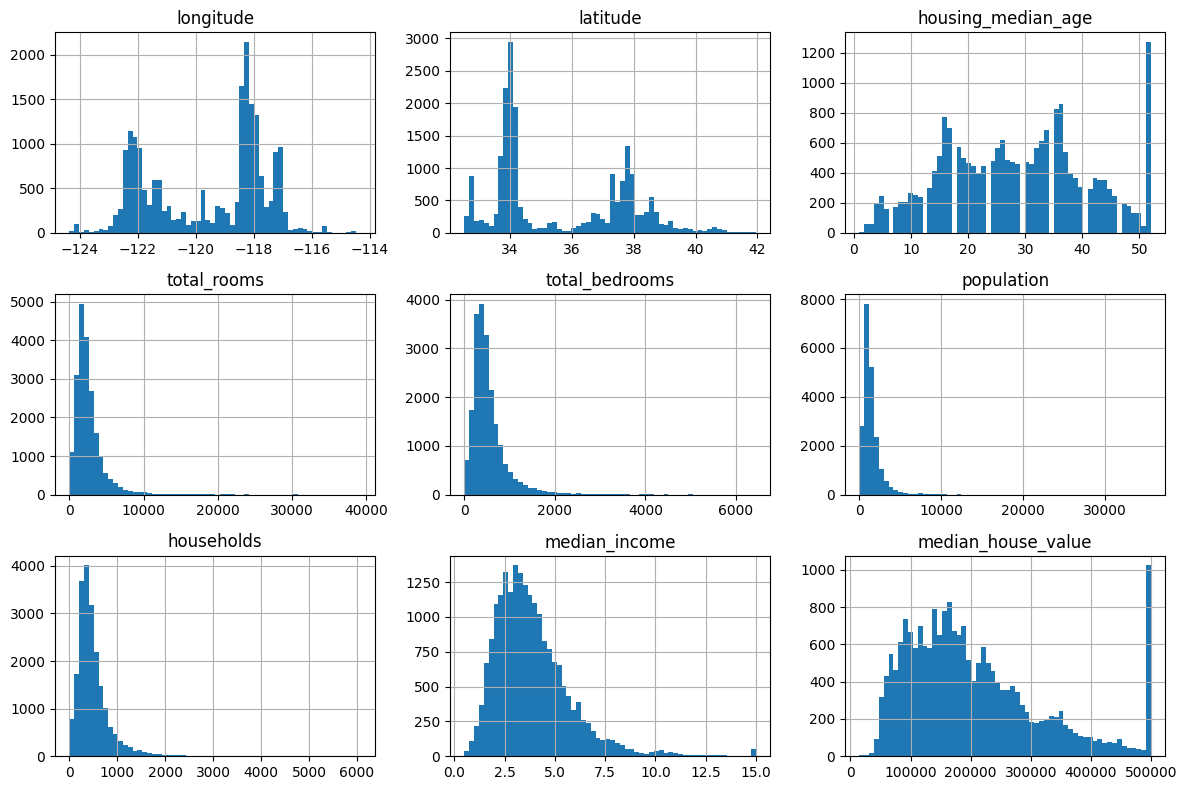

In [10]:
# 4. Plot all histograms
numeric = df.select_dtypes('number')
numeric.hist(bins=60, figsize=(12, 8))
plt.tight_layout()
plt.show()

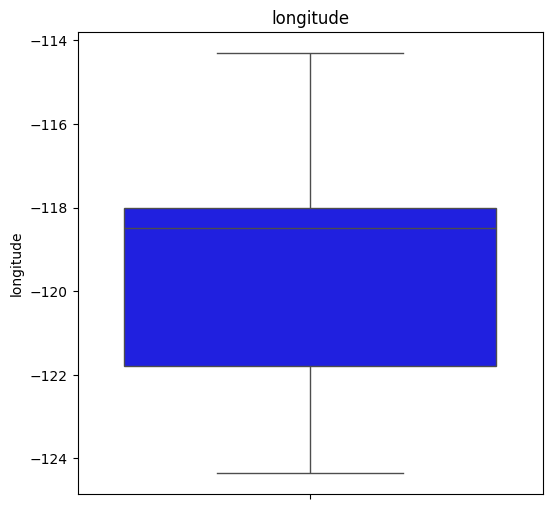

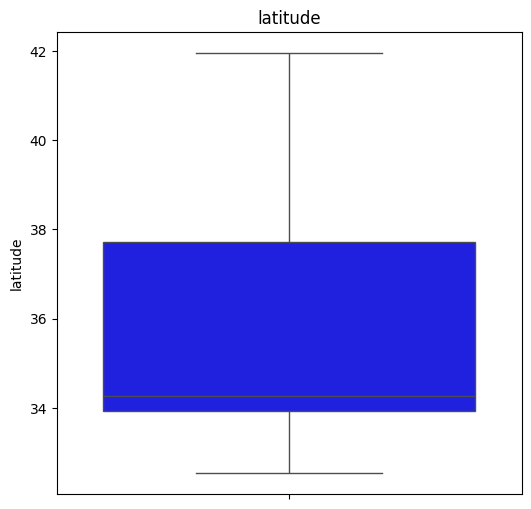

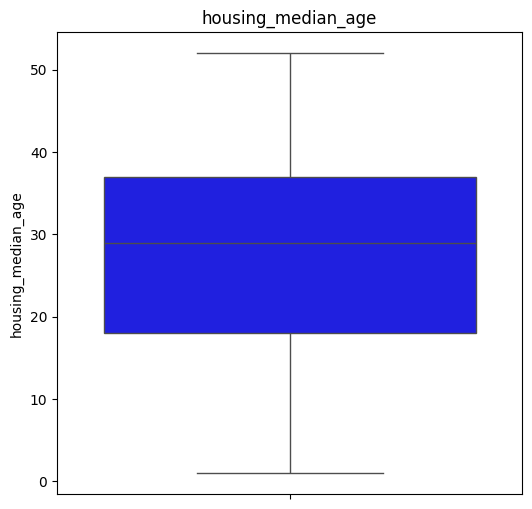

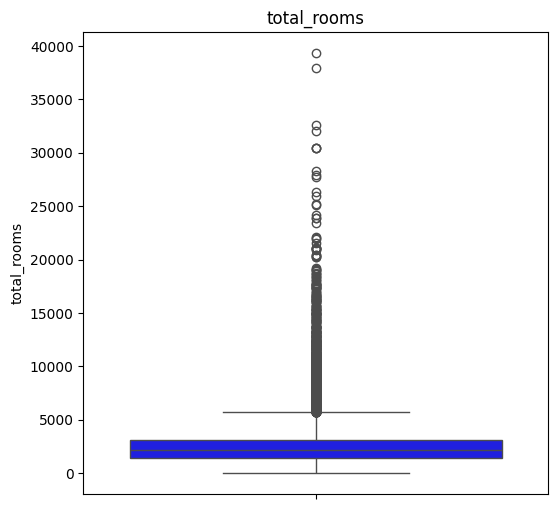

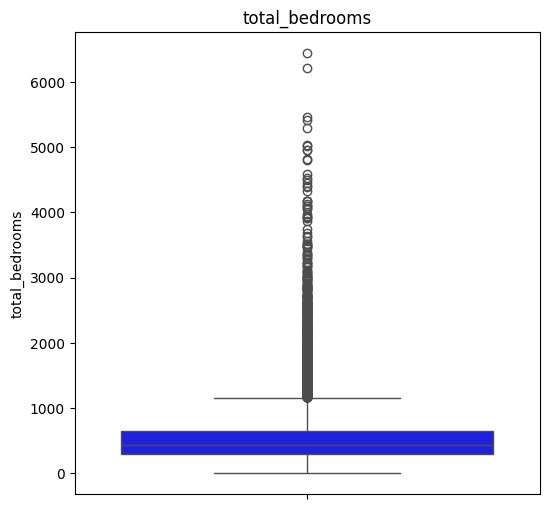

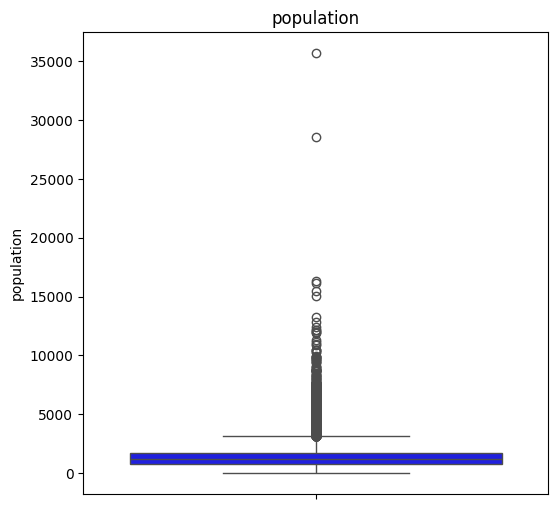

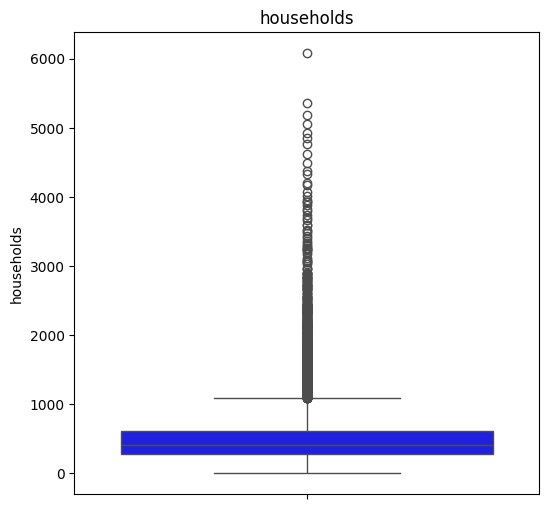

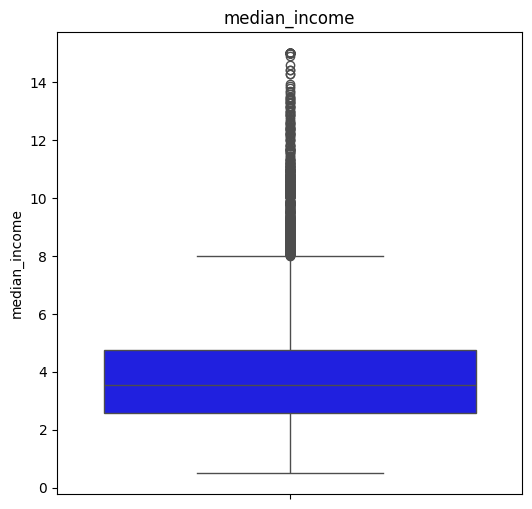

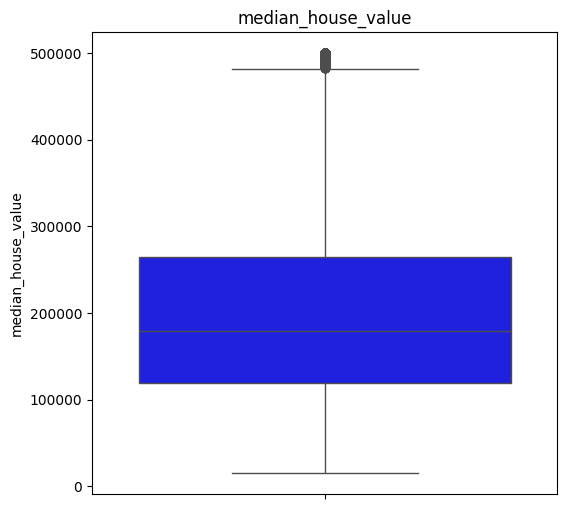

In [11]:
# 5. Plot all box plots
for col in numeric:
    plt.figure(figsize=(6, 6))
    sns.boxplot(df[col], color='blue')
    plt.title(col)
    plt.show()